## Geog 573 Advanced Geocomputing and Geospatial Big Data Analytics
## Prof. Song Gao at UW-Madison
## Example 8.1 - PySAL for Spatial Autocorrelation
## Credit: https://pysal.org/esda/notebooks/spatialautocorrelation.html

In [1]:
## install the requried PySAL packages first  
## https://pysal.org/docs/install/
import esda
import pandas as pd
import geopandas as gpd
from geopandas import GeoDataFrame
import libpysal as lps
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import Point
%matplotlib inline

In [3]:
import wget

In [4]:
wget.download('https://raw.githubusercontent.com/ljwolf/geopython/master/data/berlin-neighbourhoods.geojson')

'berlin-neighbourhoods.geojson'

neighbourhood    neighbourhood_group  \
0               Blankenfelde/Niederschönhausen                 Pankow   
1                               Helmholtzplatz                 Pankow   
2                           Wiesbadener Straße   Charlottenburg-Wilm.   
3    Schmöckwitz/Karolinenhof/Rauchfangswerder     Treptow - Köpenick   
4                                   Müggelheim     Treptow - Köpenick   
..                                         ...                    ...   
135                            Hellersdorf-Ost  Marzahn - Hellersdorf   
136                                  Mahlsdorf  Marzahn - Hellersdorf   
137                                      Ost 1          Reinickendorf   
138                                      Ost 2          Reinickendorf   
139                                       MV 2          Reinickendorf   

                                              geometry  
0    MULTIPOLYGON (((13.41191 52.61487, 13.41183 52...  
1    MULTIPOLYGON (((13.41405 52.54929, 13.41422 52...  
2    MULTIPOLYGON (((13.30748 52.46788, 13.30743 52...  
3    MULTIPOLYGON (((13.70973 52.39630, 13.70926 52...  
4    MULTIPOLYGON (((13.73762 52.40850, 13.73773 52...  
..                                                 ...  
135  MULTIPOLYGON (((13.62135 52.52704, 13.62079 52...  
136  MULTIPOLYGON (((13.65554 52.52982, 13.65693 52...  
137  MULTIPOLYGON (((13.36666 52.55823, 13.36561 52...  
138  MULTIPOLYGON (((13.36418 52.56298, 13.36423 52...  
139  MULTIPOLYGON (((13.34846 52.60664, 13.34911 52...  

[140 rows x 3 columns]

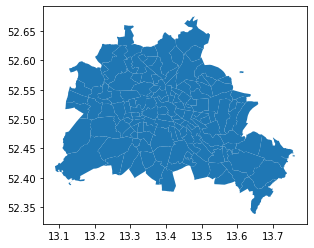

In [5]:
## Download the data from: https://github.com/ljwolf/geopython/tree/master/data
## and put into a folder in your local directory

gdf = gpd.read_file('berlin-neighbourhoods.geojson')
gdf=gdf.set_crs(crs='EPSG:4326')
gdf.plot()
gdf

In [6]:
## load the house listing POINT data 
bl_df = pd.read_csv('berlin-listings.csv.gz',compression='gzip')
geometry = [Point(xy) for xy in zip(bl_df.longitude, bl_df.latitude)]
bl_gdf = GeoDataFrame(bl_df, geometry=geometry)
bl_gdf=bl_gdf.set_crs(crs='EPSG:4326')
print(bl_gdf.columns)
bl_gdf

Index(['Unnamed: 0', 'id', 'listing_url', 'scrape_id', 'last_scraped', 'name',
       'summary', 'space', 'description', 'experiences_offered',
       'neighborhood_overview', 'notes', 'transit', 'access', 'interaction',
       'house_rules', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
     

Unnamed: 0        id                            listing_url  \
0               0  17260587  https://www.airbnb.com/rooms/17260587   
1               1  17227881  https://www.airbnb.com/rooms/17227881   
2               2   1153584   https://www.airbnb.com/rooms/1153584   
3               3   7832750   https://www.airbnb.com/rooms/7832750   
4               4  11634962  https://www.airbnb.com/rooms/11634962   
...           ...       ...                                    ...   
20048       20571  17511241  https://www.airbnb.com/rooms/17511241   
20049       20572    597413    https://www.airbnb.com/rooms/597413   
20050       20573   4712991   https://www.airbnb.com/rooms/4712991   
20051       20574  13054913  https://www.airbnb.com/rooms/13054913   
20052       20575  16976862  https://www.airbnb.com/rooms/16976862   

            scrape_id last_scraped  \
0      20170507222235   2017-05-08   
1      20170507222235   2017-05-08   
2      20170507222235   2017-05-08   
3      20170507222235   2017-05-08   
4      20170507222235   2017-05-08   
...               ...          ...   
20048  20170507222235   2017-05-08   
20049  20170507222235   2017-05-08   
20050  20170507222235   2017-05-08   
20051  20170507222235   2017-05-08   
20052  20170507222235   2017-05-08   

                                                    name  \
0      Kunterbuntes Zimmer mit eigenem Bad für jedermann   
1                       Modernes Zimmer in Berlin Pankow   
2                              Gästezimmer Berlin-Pankow   
3                      Sonniges Doppelzimmer+Nice Price!   
4         Room for womens in Pankow 30 min from the city   
...                                                  ...   
20048  Private nice room near Metro U8 and Tegel Airport   
20049                                          Cozy flat   
20050                      Loft im grünen Norden Berlins   
20051  Nice, modern, quite single room in the green N...   
20052     Tagsüber Boot fahren, abends ins Theater gehen   

                                                 summary  \
0      Meine Unterkunft ist gut für paare, alleinreis...   
1      Es ist ein schönes gepflegtes und modernes Zim...   
2      Unser Gästezimmer befindet sich im Dachgeschos...   
3      Welcome! Hier vermiete ich ein kleines Wohlfüh...   
4      Gemütliches Zimmer im ruhigen Teil von Berlin....   
...                                                  ...   
20048  Very tidy and simple flat in white town. It's ...   
20049  Schlafplatz für 2 Personen auf der Couch, sehr...   
20050  Willkommen in unserem Loft unter dem Dach. Zu ...   
20051  Meine Unterkunft liegt in einem Mehrfamilienha...   
20052  Haus direkt am Berliner See ca. 40 min mit dem...   

                                                   space  \
0                                                    NaN   
1      Das Haus befindet sich direkt vor eine Tram Ha...   
2      Wenn Ihr eine anspruchsvolles Ambiente sucht, ...   
3      Die Wohnung ist durch Ihre Lage sehr schön hel...   
4      Es handelt sich um ein großes, gemütliches Zim...   
...                                                  ...   
20048                                                NaN   
20049  We have a sunny room in Berlin Reinickendorf n...   
20050  Das Apartment ist hell und freundlich geschnit...   
20051  My apartment is situated in the northern outsk...   
20052                                                NaN   

                                             description experiences_offered  \
0      Meine Unterkunft ist gut für paare, alleinreis...                none   
1      Es ist ein schönes gepflegtes und modernes Zim...                none   
2      Unser Gästezimmer befindet sich im Dachgeschos...                none   
3      Welcome! Hier vermiete ich ein kleines Wohlfüh...                none   
4      Gemütliches Zimmer im ruhigen Teil von Berlin....                none   
...                                                  ...          

In [7]:
## Process the data and compute the median house price per neighborhood polygon  
#bl_gdf['price']=bl_gdf['price'].str.replace('$','')
#bl_gdf['price']=bl_gdf['price'].str.replace(',','')
bl_gdf['price'] = bl_gdf['price'].astype('float32')
sj_gdf = gpd.sjoin(gdf, bl_gdf, how='inner', predicate='intersects', lsuffix='left', rsuffix='right')
median_price_gb = sj_gdf['price'].groupby([sj_gdf['neighbourhood_group']]).mean()
print(type(median_price_gb))
median_price_gb

<class 'pandas.core.series.Series'>


neighbourhood_group
Charlottenburg-Wilm.        58.556408
Friedrichshain-Kreuzberg    55.492809
Lichtenberg                 44.584270
Marzahn - Hellersdorf       54.246754
Mitte                       60.387890
Neukölln                    45.135948
Pankow                      60.282516
Reinickendorf               43.682465
Spandau                     48.236561
Steglitz - Zehlendorf       54.445683
Tempelhof - Schöneberg      53.704407
Treptow - Köpenick          51.222004
Name: price, dtype: float32

neighbourhood   neighbourhood_group  \
0             Blankenfelde/Niederschönhausen                Pankow   
1                             Helmholtzplatz                Pankow   
2                         Wiesbadener Straße  Charlottenburg-Wilm.   
3  Schmöckwitz/Karolinenhof/Rauchfangswerder    Treptow - Köpenick   
4                                 Müggelheim    Treptow - Köpenick   

                                            geometry  median_pri  
0  MULTIPOLYGON (((13.41191 52.61487, 13.41183 52...   60.282516  
1  MULTIPOLYGON (((13.41405 52.54929, 13.41422 52...   60.282516  
2  MULTIPOLYGON (((13.30748 52.46788, 13.30743 52...   58.556408  
3  MULTIPOLYGON (((13.70973 52.39630, 13.70926 52...   51.222004  
4  MULTIPOLYGON (((13.73762 52.40850, 13.73773 52...   51.222004

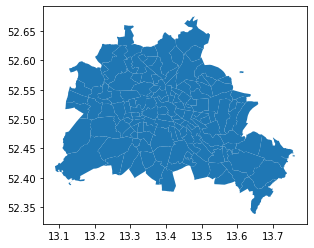

In [8]:
gdf = gdf.join(median_price_gb, on='neighbourhood_group')
gdf.rename(columns={'price': 'median_pri'}, inplace=True)
gdf.plot()
gdf.head()

## Fill the NAN values with the mean or median prices

2


ImportError: The 'mapclassify' package (>= 2.4.0) is required to use the 'scheme' keyword.

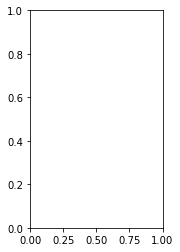

In [9]:
# check the neighborhood with 'NAN' values
# fill the NAN values with the mean of median prices
# More color maps: https://matplotlib.org/stable/tutorials/colors/colormaps.html

print(pd.isnull(gdf['median_pri']).sum())
gdf['median_pri'].fillna((gdf['median_pri'].mean()), inplace=True)

ax = gdf.plot(column='median_pri', scheme='QUANTILES', k=4, \
             cmap='viridis', legend=True,
             legend_kwds={'loc': 'center left', 'bbox_to_anchor':(1,0.5)})

print(pd.isnull(gdf['median_pri']).sum())


## Spatial Autocorrelation
Visual inspection of the map pattern for the prices allows us to search for spatial structure. If the spatial distribution of the prices was random, then we should not see any clustering of similar values on the map. However, our visual system is drawn to the clusters (e.g., higher prices) in the north central neighborhoods.

Our brains are very powerful pattern recognition machines. However, sometimes they can be too powerful and lead us to detect false positives, or patterns where there are no statistical patterns. This is a particular concern when dealing with visualization of irregular polygons of differning sizes and shapes.

The concept of spatial autocorrelation relates to the combination of two types of information: spatial weights and attribute similarity. Although there are many different measures of spatial autocorrelation, they all combine these two types of information into a summary measure.

Let’s use PySAL to generate these two types of information.

In [10]:
## spatial weights: https://pysal.org/libpysal/generated/libpysal.weights.Queen.html
import libpysal as lps
df = gdf
wq =  lps.weights.Queen.from_dataframe(df)
wq.transform = 'r' # spatial weights require that the matrix is row-standardized 

C:\Users\ramak\anaconda3\lib\site-packages\libpysal\weights\weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 2 disconnected components.
  warnings.warn(message)


In [11]:
df

neighbourhood    neighbourhood_group  \
0               Blankenfelde/Niederschönhausen                 Pankow   
1                               Helmholtzplatz                 Pankow   
2                           Wiesbadener Straße   Charlottenburg-Wilm.   
3    Schmöckwitz/Karolinenhof/Rauchfangswerder     Treptow - Köpenick   
4                                   Müggelheim     Treptow - Köpenick   
..                                         ...                    ...   
135                            Hellersdorf-Ost  Marzahn - Hellersdorf   
136                                  Mahlsdorf  Marzahn - Hellersdorf   
137                                      Ost 1          Reinickendorf   
138                                      Ost 2          Reinickendorf   
139                                       MV 2          Reinickendorf   

                                              geometry  median_pri  
0    MULTIPOLYGON (((13.41191 52.61487, 13.41183 52...   60.282516  
1    MULTIPOLYGON (((13.41405 52.54929, 13.41422 52...   60.282516  
2    MULTIPOLYGON (((13.30748 52.46788, 13.30743 52...   58.556408  
3    MULTIPOLYGON (((13.70973 52.39630, 13.70926 52...   51.222004  
4    MULTIPOLYGON (((13.73762 52.40850, 13.73773 52...   51.222004  
..                                                 ...         ...  
135  MULTIPOLYGON (((13.62135 52.52704, 13.62079 52...   54.246754  
136  MULTIPOLYGON (((13.65554 52.52982, 13.65693 52...   54.246754  
137  MULTIPOLYGON (((13.36666 52.55823, 13.36561 52...   43.682465  
138  MULTIPOLYGON (((13.36418 52.56298, 13.36423 52...   43.682465  
139  MULTIPOLYGON (((13.34846 52.60664, 13.34911 52...   43.682465  

[140 rows x 4 columns]

## Attribute Similarity
So the spatial weight between neighborhoods and  indicates if the two are neighbors (i.e., geographically similar). What we also need is a measure of attribute similarity to pair up with the spatial weights. The spatial lag is a derived variable that accomplishes this for us. For neighborhood  the spatial lag is defined as: 

$ylag_i = \sum_j{w_{i,j}*y_j} $


In [94]:
y = df['median_pri']
ylag = lps.weights.lag_spatial(wq, y)
ylag

array([56.9625061 , 60.28251648, 56.37749926, 51.22200394, 51.22200394,
       50.52180099, 43.6824646 , 45.63422012, 52.65491422, 60.28251648,
       53.64180374, 52.73586273, 52.73586273, 56.47182541, 47.83247757,
       58.58870177, 60.33520317, 59.60296903, 60.38788986, 60.02159348,
       51.80624199, 57.94034958, 52.84482813, 53.40314266, 57.90522512,
       60.28251648, 60.28251648, 55.79730334, 56.79401737, 50.81182589,
       59.01427841, 60.29756982, 60.28251648, 50.86356888, 60.3220315 ,
       60.28251648, 55.48057556, 54.42881557, 60.32466583, 59.50179418,
       54.42846909, 58.55640793, 58.55640793, 57.73426285, 57.47818544,
       57.74774106, 56.13040733, 48.23656082, 48.23656082, 53.74621709,
       55.11957245, 45.95951271, 51.67650986, 54.1985906 , 51.45368042,
       52.36880302, 54.44568253, 54.44568253, 50.84825389, 56.50104523,
       53.92108345, 55.9956289 , 50.49590378, 49.14499828, 48.61369433,
       49.70049   , 49.32550866, 51.22200394, 51.22200394, 47.80

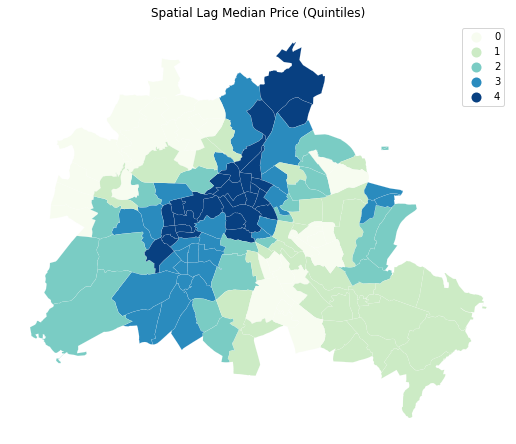

In [95]:
import mapclassify as mc
ylagq5 = mc.Quantiles(ylag, k=5)
f, ax = plt.subplots(1, figsize=(9, 9))
df.assign(cl=ylagq5.yb).plot(column='cl', categorical=True, \
        k=5, cmap='GnBu', linewidth=0.1, ax=ax, \
        edgecolor='white', legend=True)
ax.set_axis_off()
plt.title("Spatial Lag Median Price (Quintiles)")
plt.show()

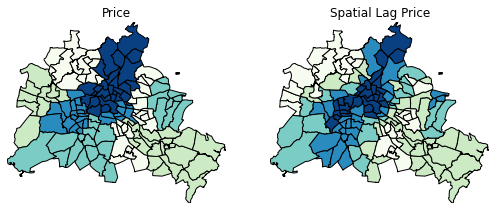

In [96]:
#The quintile map for the spatial lag tends to enhance the impression of value similarity in space. It is, in effect, a local smoother.
df['lag_median_pri'] = ylag
f,ax = plt.subplots(1,2,figsize=(2.16*4,4))
df.plot(column='median_pri', ax=ax[0], edgecolor='k',
        scheme="quantiles",  k=5, cmap='GnBu')
ax[0].axis(df.total_bounds[np.asarray([0,2,1,3])])
ax[0].set_title("Price")
df.plot(column='lag_median_pri', ax=ax[1], edgecolor='k',
        scheme='quantiles', cmap='GnBu', k=5)
ax[1].axis(df.total_bounds[np.asarray([0,2,1,3])])
ax[1].set_title("Spatial Lag Price")
ax[0].axis('off')
ax[1].axis('off')
plt.show()

## Global Spatial Autocorrelation
Moran’s I is a test for global autocorrelation for a continuous attribute:

In [98]:
y = df['median_pri'] # target variable
wq =  lps.weights.Queen.from_dataframe(df) # compute the spatial weights
wq.transform = 'r' # spatial weights require that the matrix is row-standardized 
np.random.seed(12345)
mi = esda.moran.Moran(y, wq)
mi.I

0.6563069331329718

Our value for the statistic needs to be interpreted against a reference distribution under the null of completely spatial randomness. PySAL uses random spatial permutations to compute this statistic.

Text(0.5, 0, "Moran's I")

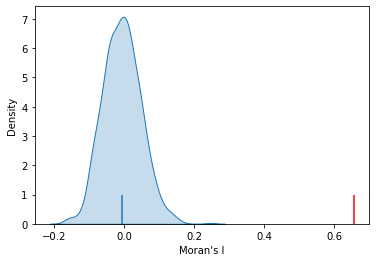

In [60]:
import seaborn as sbn
sbn.kdeplot(mi.sim, shade=True)
plt.vlines(mi.I, 0, 1, color='r') # observed value
plt.vlines(mi.EI, 0,1)
plt.xlabel("Moran's I")

Here our observed value is again in the upper tail and it is statistically significan with p-value of:

In [61]:
mi.p_sim

0.001

## Local Autocorrelation: Hot Spots, Cold Spots, and Spatial Outliers

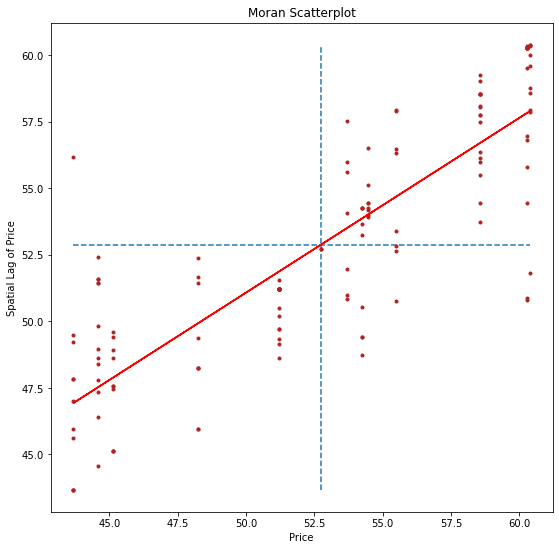

In [99]:
y = df['median_pri'] # target variable
wq = lps.weights.Queen.from_dataframe(df) # compute the spatial weights
wq.transform = 'r' # spatial weights require that the matrix is row-standardized 
np.random.seed(12345)
lag_price = lps.weights.lag_spatial(wq, df['median_pri'])
price = df['median_pri']
b, a = np.polyfit(price, lag_price, 1)
f, ax = plt.subplots(1, figsize=(9, 9))

plt.plot(price, lag_price, '.', color='firebrick')

 # dashed vert at mean of the price
plt.vlines(price.mean(), lag_price.min(), lag_price.max(), linestyle='--')
 # dashed horizontal at mean of lagged price
plt.hlines(lag_price.mean(), price.min(), price.max(), linestyle='--')

# red line of best fit using global I as slope
plt.plot(price, a + b*price, 'r')
plt.title('Moran Scatterplot')
plt.ylabel('Spatial Lag of Price')
plt.xlabel('Price')
plt.show()

In [ ]:
## Compute the local Indicator of Spatial Autocorrelation (LISA)

## https://pysal.org/esda/notebooks/spatialautocorrelation.html

li = esda.moran.Moran_Local(y, wq)
